<a href="https://colab.research.google.com/github/NicoAN42/SKRPSI/blob/main/amitofoo_v1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#mount dataset
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import tensorflow
from tensorflow.keras.layers import Conv2D, Input, concatenate, Activation, InputLayer, Dense, Reshape, Flatten
from tensorflow.keras.layers import LeakyReLU,ReLU, MaxPooling2D, BatchNormalization,GlobalMaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import layers
from tensorflow.keras.activations import softmax,sigmoid
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, Nadam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout,SpatialDropout2D,GaussianDropout
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import os
import random
import shutil

In [3]:
#from tensorflow.keras.optimizers import SGD

In [4]:
CLASS = 3
#sourcepath isi semua data train, folder valid kosongin datanya sisai folder classnya
sourcePath = '/content/drive/MyDrive/Colab Notebooks/Dataset Final/'
train_path = '/content/drive/MyDrive/Colab Notebooks/Dataset Final/train'
valid_path = '/content/drive/MyDrive/Colab Notebooks/Dataset Final/valid'
test_path = '/content/drive/MyDrive/Colab Notebooks/Dataset Final/test'

#nico

In [5]:
classLabels =['covid','normal', 'pneumonia']

In [6]:
model = Sequential()

In [7]:
model.add(layers.InputLayer(input_shape=(256, 256, 3)))

In [8]:
input_Layer=model.add(layers.InputLayer(input_shape=(256, 256, 3)))

In [9]:
#Layer 1
model.add(layers.Conv2D(32, (3,3), padding='same', name='conv_1'))
model.add(LeakyReLU(alpha=0.1))
#model.add(layers.SpatialDropout2D(0.2,data_format='channels_first'))
model.add(layers.BatchNormalization(name='norm_1'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides= 2))
model.add(layers.Dropout(0.2))


In [10]:
#Layer 2
model.add(layers.Conv2D(64, (3,3), padding='same', name='conv_2')),
#model.add(layers.Dropout(0.1))
#x = Dense(units=128,activation='relu')(x),
model.add(LeakyReLU(alpha=0.1))
model.add(layers.BatchNormalization(name='norm_2'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides = 2))
model.add(layers.Dropout(0.2))


In [11]:
# Layer 3
model.add(layers.Conv2D(128, (3,3), padding='same', name='conv_3'))
model.add(LeakyReLU(alpha=0.1))
#model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization(name='norm_3'))
#model.add(layers.MaxPooling2D(pool_size=(2, 2), strides = 2))


In [12]:
# Layer 4
#model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (1,1), padding='same', name='conv_4'))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.BatchNormalization(name='norm_4'))
#model.add(layers.MaxPooling2D(pool_size=(2, 2), strides = 2))
#model.add(layers.Dropout(0.5))

In [13]:
# Layer 5
model.add(layers.Conv2D(128, (3,3), padding='same', name='conv_5'))
model.add(LeakyReLU(alpha=0.1))
#model.add(layers.Dropout(0.1))
model.add(layers.BatchNormalization(name='norm_5'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides = 2))
model.add(layers.Dropout(0.2))


In [14]:
# Layer 6
#model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(256, (3,3), padding='same', name='conv_6'))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.BatchNormalization(name='norm_6'))
#model.add(layers.MaxPooling2D(pool_size=(2, 2), strides = 2))
#model.add(layers.Dropout(0.5))


In [15]:
# Layer 7
model.add(layers.Conv2D(128, (1,1), padding='same', name='conv_7'))
model.add(LeakyReLU(alpha=0.1))
#model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization(name='norm_7'))
#model.add(layers.MaxPooling2D(pool_size=(2, 2), strides = 2))


In [16]:
# Layer 8
#model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(256, (3,3), padding='same', name='conv_8'))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.BatchNormalization(name='norm_8'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides = 2))
model.add(layers.Dropout(0.5))


In [17]:
# Layer 9
model.add(layers.Conv2D(512, (3,3), padding='same', name='conv_9'))
model.add(LeakyReLU(alpha=0.1))
#model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization(name='norm_9'))
#model.add(layers.MaxPooling2D(pool_size=(2, 2), strides = 2))


In [18]:
# Layer 10
#model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(256, (3,3), padding='same', name='conv_10'))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.BatchNormalization(name='norm_10'))
#model.add(layers.MaxPooling2D(pool_size=(2, 2), strides = 2))
#model.add(layers.Dropout(0.5))


In [19]:

# Layer 11
model.add(layers.Conv2D(512, (3,3), padding='same', name='conv_11'))
model.add(LeakyReLU(alpha=0.1))
#model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization(name='norm_11'))
#model.add(layers.MaxPooling2D(pool_size=(2, 2), strides = 2))


In [20]:
# Layer 12
#model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(256, (1,1), padding='same', name='conv_12'))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.BatchNormalization(name='norm_12'))
#model.add(layers.MaxPooling2D(pool_size=(2, 2), strides = 2))
#model.add(layers.Dropout(0.5))


In [21]:
# Layer 13
model.add(layers.Conv2D(512, (3,3), padding='same', name='conv_13'))
model.add(LeakyReLU(alpha=0.1))
#model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization(name='norm_13'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides = 2))
model.add(layers.Dropout(0.2))

In [22]:
###
#model.add(layers.SpatialDropout2D(0.2,data_format='channels_first'))
###


In [23]:
# Layer 14
#model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(1024, (3,3), padding='same', name='conv_14'))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.BatchNormalization(name='norm_14'))
#model.add(layers.MaxPooling2D(pool_size=(2, 2), strides = 2))
#model.add(layers.Dropout(0.5))


In [24]:
# Layer 15
model.add(layers.Conv2D(512, (1,1), padding='same', name='conv_15'))
model.add(LeakyReLU(alpha=0.1))
#model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization(name='norm_15'))
#model.add(layers.MaxPooling2D(pool_size=(2, 2), strides = 2))


In [25]:
# Layer 16
#model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(1024, (3,3), padding='same', name='conv_16'))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.BatchNormalization(name='norm_16'))
#model.add(layers.MaxPooling2D(pool_size=(2, 2), strides = 2))
#model.add(layers.Dropout(0.5))

In [26]:
# Layer 17
model.add(layers.Conv2D(512, (1,1), padding='same', name='conv_17'))
model.add(LeakyReLU(alpha=0.1))
#model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization(name='norm_17'))
#model.add(layers.MaxPooling2D(pool_size=(2, 2), strides = 2))


In [27]:
# Layer 18
#model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(1024, (3,3), padding='same', name='conv_18'))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.BatchNormalization(name='norm_18'))
#model.add(layers.MaxPooling2D(pool_size=(2, 2), strides = 2))
#model.add(layers.Dropout(0.5))


In [28]:
# Layer 19
model.add(layers.Conv2D(1024, (3,3), padding='same', name='conv_19'))
model.add(LeakyReLU(alpha=0.1))
#model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization(name='norm_19'))
model.add(layers.MaxPooling2D(pool_size=(1, 1), strides = 2))
#model.add(layers.Dropout(0.5))

In [29]:
#model.add(layers.Conv2D(5 * (4 + 1 + CLASS), (1,1), strides=(2,2), padding='same', name='conv_semi'))
#model.add(LeakyReLU(alpha=0.1))
#model.add(layers.SpatialDropout2D(0.2,data_format='channels_first'))
#model.add(layers.Dropout(0.5))
#model.add(layers.Conv2D(5 * (4 + 1 + CLASS), (1,1), strides=(2,2), padding='same', name='conv_final'))
#model.add(layers.Conv2D(3, (3,3), padding='same', name='conv_final'))
#model.add(LeakyReLU(alpha=0.1))
#model.add(layers.Dropout(0.1))


In [30]:
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(1024))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024,model.add(LeakyReLU(alpha=0.1))))
model.add(layers.Dense(1024,Activation('softmax')))
model.output_shape

(None, 1024)

In [31]:
output = model.output_shape

In [32]:
print(input_Layer)

None


In [33]:
initial_learning_rate=0.001

In [34]:
lr_schedule = ExponentialDecay(
   initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)


In [35]:
opt = Adam(learning_rate=initial_learning_rate)

In [36]:
model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"] )

In [37]:
print(model.summary())
print(model)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        multiple                  0         
                                                                 
 conv_1 (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256, 256, 32)      0         
                                                                 
 norm_1 (BatchNormalization)  (None, 256, 256, 32)     128       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 128, 128, 32)      0         
                                                        

In [38]:
X = []
Y = []
def transferBetweenFolders(source, dest, splitRate): 
    global sourceFiles
    sourceFiles=os.listdir(source)
    if(len(sourceFiles)!=0):
        transferFileNumbers=int(len(sourceFiles)*splitRate)
        transferIndex=random.sample(range(0, len(sourceFiles)), transferFileNumbers)
        for eachIndex in transferIndex:
            shutil.move(source+str(sourceFiles[eachIndex]), dest+str(sourceFiles[eachIndex]))
    else:
        print("No file moved. Source empty!")
        

In [39]:
def transferAllClassBetweenFolders(source, dest, splitRate):
    for label in classLabels:
        transferBetweenFolders(sourcePath+'/'+source+'/'+label+'/', 
                               sourcePath+'/'+dest+'/'+label+'/', 
                               splitRate)
        

In [40]:
def prepareNameWithLabels(folderName):
    sourceFiles=os.listdir(sourcePath+'/train/'+folderName)
    for val in sourceFiles:
        X.append(val)
        for i in range(len(classLabels)):
          if(folderName==classLabels[i]):
              Y.append(i)
# Organize file names and class labels in X and Y variables
for i in range(len(classLabels)):
  prepareNameWithLabels(classLabels[i])

def my_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred,average='weighted')
    f1Score=f1_score(y_true, y_pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    cm=confusion_matrix(y_true, y_pred)
    print(cm)
    return accuracy, precision, f1Score

In [41]:
X=np.asarray(X)
Y=np.asarray(Y)

print(X)
print(Y)

skf = StratifiedKFold(n_splits=5
                      , shuffle=True)
skf.get_n_splits(X, Y)
foldNum=0

['COVID(400).png' 'COVID(819).png' 'COVID(498).png' ...
 'person1430_virus_2444.jpeg' 'person1411_bacteria_3598.jpeg'
 'person1433_virus_2447.jpeg']
[0 0 0 ... 2 2 2]


Results for fold 1
Found 1924 images belonging to 3 classes.
Found 380 images belonging to 3 classes.
Found 405 images belonging to 3 classes.
Epoch 1/100
61/61 - 267s - loss: 1.2974 - accuracy: 0.6970 - val_loss: 269.6132 - val_accuracy: 0.5250 - 267s/epoch - 4s/step
Epoch 2/100
61/61 - 33s - loss: 0.4469 - accuracy: 0.8565 - val_loss: 11.0536 - val_accuracy: 0.4344 - 33s/epoch - 535ms/step
Epoch 3/100
61/61 - 29s - loss: 0.3035 - accuracy: 0.9002 - val_loss: 8.6320 - val_accuracy: 0.6344 - 29s/epoch - 477ms/step
Epoch 4/100
61/61 - 29s - loss: 0.2550 - accuracy: 0.9148 - val_loss: 9.9722 - val_accuracy: 0.4000 - 29s/epoch - 472ms/step
Epoch 5/100
61/61 - 29s - loss: 0.1944 - accuracy: 0.9356 - val_loss: 6.1645 - val_accuracy: 0.4719 - 29s/epoch - 472ms/step
Epoch 6/100
61/61 - 29s - loss: 0.1821 - accuracy: 0.9433 - val_loss: 2.1556 - val_accuracy: 0.5406 - 29s/epoch - 471ms/step
Epoch 7/100
61/61 - 29s - loss: 0.1146 - accuracy: 0.9584 - val_loss: 1.8947 - val_accuracy: 0.6219 - 29s

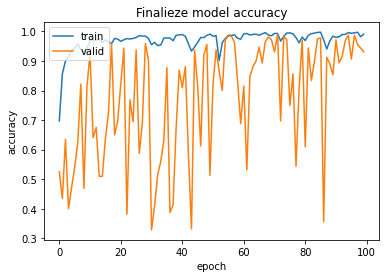

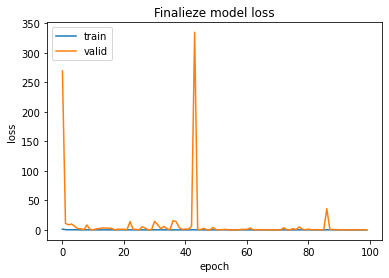

12/12 [==============================] - 6s 419ms/step
***Performance on Validation data***
Accuracy  : 0.3105263157894737
Precision : 0.3102621019922419
f1Score : 0.30916717329704635
[[40 37 49]
 [44 33 51]
 [43 38 45]]
Results for fold 2
Found 1924 images belonging to 3 classes.
Found 380 images belonging to 3 classes.
Found 405 images belonging to 3 classes.
Epoch 1/100
61/61 - 29s - loss: 0.0419 - accuracy: 0.9896 - val_loss: 0.0656 - val_accuracy: 0.9781 - 29s/epoch - 475ms/step
Epoch 2/100
61/61 - 29s - loss: 0.0391 - accuracy: 0.9870 - val_loss: 3.0803 - val_accuracy: 0.4906 - 29s/epoch - 469ms/step
Epoch 3/100
61/61 - 28s - loss: 0.0293 - accuracy: 0.9891 - val_loss: 0.7229 - val_accuracy: 0.8313 - 28s/epoch - 467ms/step
Epoch 4/100
61/61 - 29s - loss: 0.0119 - accuracy: 0.9958 - val_loss: 0.0668 - val_accuracy: 0.9781 - 29s/epoch - 469ms/step
Epoch 5/100
61/61 - 28s - loss: 0.0210 - accuracy: 0.9922 - val_loss: 1.6891 - val_accuracy: 0.7281 - 28s/epoch - 467ms/step
Epoch 6/100

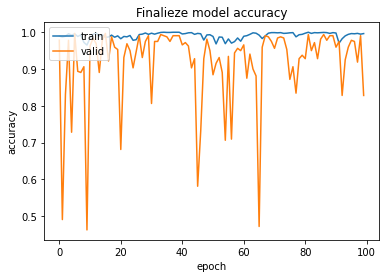

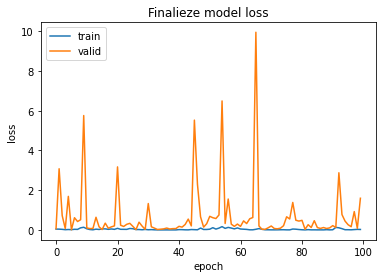

12/12 [==============================] - 5s 407ms/step
***Performance on Validation data***
Accuracy  : 0.3131578947368421
Precision : 0.30719950409701097
f1Score : 0.3014521574782971
[[29 64 33]
 [34 63 31]
 [36 63 27]]
Results for fold 3
Found 1924 images belonging to 3 classes.
Found 380 images belonging to 3 classes.
Found 405 images belonging to 3 classes.
Epoch 1/100
61/61 - 29s - loss: 0.0440 - accuracy: 0.9917 - val_loss: 0.4529 - val_accuracy: 0.8219 - 29s/epoch - 475ms/step
Epoch 2/100
61/61 - 29s - loss: 0.0298 - accuracy: 0.9912 - val_loss: 6.7826e-04 - val_accuracy: 1.0000 - 29s/epoch - 476ms/step
Epoch 3/100
61/61 - 28s - loss: 0.0160 - accuracy: 0.9953 - val_loss: 0.0019 - val_accuracy: 1.0000 - 28s/epoch - 465ms/step
Epoch 4/100
61/61 - 28s - loss: 0.0022 - accuracy: 0.9990 - val_loss: 5.7650e-04 - val_accuracy: 1.0000 - 28s/epoch - 464ms/step
Epoch 5/100
61/61 - 28s - loss: 0.0258 - accuracy: 0.9922 - val_loss: 0.7137 - val_accuracy: 0.8156 - 28s/epoch - 456ms/step
Epo

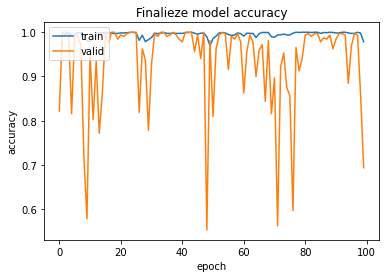

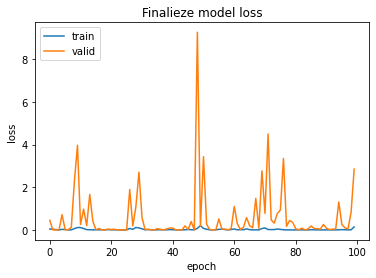

12/12 [==============================] - 5s 393ms/step
***Performance on Validation data***
Accuracy  : 0.3105263157894737
Precision : 0.3112388017917133
f1Score : 0.2733033889978062
[[11 76 39]
 [10 76 42]
 [12 83 31]]
Results for fold 4
Found 1924 images belonging to 3 classes.
Found 380 images belonging to 3 classes.
Found 405 images belonging to 3 classes.
Epoch 1/100
61/61 - 29s - loss: 0.0960 - accuracy: 0.9828 - val_loss: 4.4450 - val_accuracy: 0.6938 - 29s/epoch - 469ms/step
Epoch 2/100
61/61 - 28s - loss: 0.0320 - accuracy: 0.9927 - val_loss: 0.0277 - val_accuracy: 0.9844 - 28s/epoch - 464ms/step
Epoch 3/100
61/61 - 28s - loss: 0.0152 - accuracy: 0.9943 - val_loss: 0.0963 - val_accuracy: 0.9781 - 28s/epoch - 463ms/step
Epoch 4/100
61/61 - 29s - loss: 0.0178 - accuracy: 0.9958 - val_loss: 0.0198 - val_accuracy: 0.9906 - 29s/epoch - 468ms/step
Epoch 5/100
61/61 - 28s - loss: 0.0054 - accuracy: 0.9979 - val_loss: 0.0013 - val_accuracy: 1.0000 - 28s/epoch - 462ms/step
Epoch 6/100


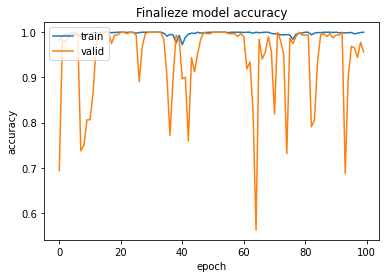

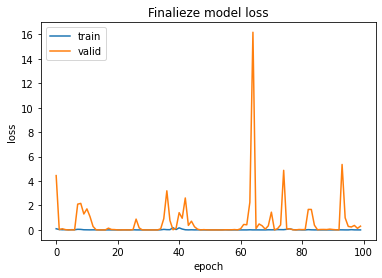

12/12 [==============================] - 5s 372ms/step
***Performance on Validation data***
Accuracy  : 0.35789473684210527
Precision : 0.3568871270150528
f1Score : 0.3569648002780583
[[46 46 34]
 [50 37 41]
 [40 33 53]]
Results for fold 5
Found 1925 images belonging to 3 classes.
Found 379 images belonging to 3 classes.
Found 405 images belonging to 3 classes.
Epoch 1/100
61/61 - 29s - loss: 0.0309 - accuracy: 0.9938 - val_loss: 1.4569 - val_accuracy: 0.8344 - 29s/epoch - 475ms/step
Epoch 2/100
61/61 - 29s - loss: 0.0115 - accuracy: 0.9969 - val_loss: 0.2621 - val_accuracy: 0.9656 - 29s/epoch - 469ms/step
Epoch 3/100
61/61 - 28s - loss: 0.0258 - accuracy: 0.9953 - val_loss: 4.4430 - val_accuracy: 0.6812 - 28s/epoch - 466ms/step
Epoch 4/100
61/61 - 28s - loss: 0.0206 - accuracy: 0.9964 - val_loss: 0.1131 - val_accuracy: 0.9906 - 28s/epoch - 464ms/step
Epoch 5/100
61/61 - 28s - loss: 0.0535 - accuracy: 0.9927 - val_loss: 0.0619 - val_accuracy: 0.9844 - 28s/epoch - 465ms/step
Epoch 6/100

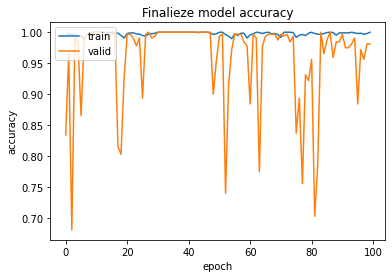

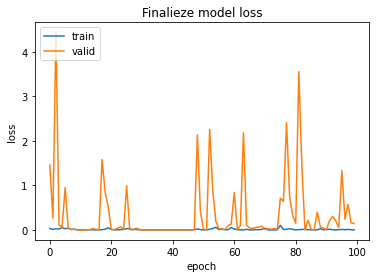

12/12 [==============================] - 5s 407ms/step
***Performance on Validation data***
Accuracy  : 0.35883905013192613
Precision : 0.3587962576193064
f1Score : 0.35877280960757213
[[47 39 40]
 [46 43 38]
 [37 43 46]]


In [42]:
for train_index, val_index in skf.split(X, Y):
    #First cut all images from validation to train (if any exists)
    transferAllClassBetweenFolders('valid', 'train', 1.0)
    foldNum+=1
    print("Results for fold",foldNum)
    X_train, X_val = X[train_index], X[val_index]
    Y_train, Y_val = Y[train_index], Y[val_index]
    # Move validation images of this fold from train folder to the validation folder
    for eachIndex in range(len(X_val)):
        classLabel=''
        for i in range(len(classLabels)):
          if(Y_val[eachIndex]==i):
              classLabel=classLabels[i]
        #Then, copy the validation images to the validation folder
        shutil.move(sourcePath+'/train/'+classLabel+'/'+X_val[eachIndex], 
                    sourcePath+'/valid/'+classLabel+'/'+X_val[eachIndex])
        
    train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(256,256), classes=['covid', 'normal', 'pneumonia'], class_mode = 'sparse', batch_size = 32)
    valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(256,256), classes=['covid', 'normal', 'pneumonia'], class_mode = 'sparse', batch_size = 32)
    test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(256,256), classes=['covid', 'normal', 'pneumonia'], class_mode = 'sparse', batch_size = 32)

    history = model.fit(train_batches, 
                    #steps_per_epoch=sp_epoch, 
                    validation_data=valid_batches, 
                    validation_steps=10, 
                    epochs=100, 
                    verbose=2)
    model.evaluate(test_batches)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Finalieze model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Finalieze model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()
    predictions = model.predict(valid_batches, verbose=1)
    yPredictions = np.argmax(predictions, axis=1)
    true_classes = valid_batches.classes
    # evaluate validation performance
    print("***Performance on Validation data***")    
    valAcc, valPrec, valFScore = my_metrics(true_classes, yPredictions)